In [1]:
#数据加载
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import itertools
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth',200)
data= pd.read_csv("E:\\海晟work\\5.0违规违法检测\\莆田客户数据分析(专卖营销)\\莆田客户数据分析(专卖营销).csv",encoding='gbk')

In [3]:
#数据初步预览
data.head(5)

,统计月份,机构编码,客户编码,客户名称,许可证号,经营地址,县专卖局代码(二级网格),县专卖局名称(二级网格),专管所代码(三级网格),专管所名称(三级网格),市场管理员代码(四级网格),市场管理员名称(四级网格),专管片区代码(五级网格),专管片区名称(五级网格),客户业态代码,客户业态,市场类型代码,市场类型,商业环境代码,商业环境,发证日期,经营者身份证号码,性别,状态,违规次数（真烟外流）,真烟外流数量（条）,违法次数,案值,案件性质（案由）,诚信扣分（分）,诚信扣分次数,查获假烟及走私烟数量,查获流入真烟数量,异地开店并且被查处次数（跨市）,异地开店并且被查处次数（跨区县,卷烟经营年限值,卷烟经营年限,终端类型,月均销售量值,月均销售量,年销售增幅值,年销售增幅,月均进货金额值,月均进货金额,条均价值,条均价水平,经营品种数,省产烟占比值,省产烟占比,近三年真烟流出总条数,近三年单次外流单品种5条(含)以?,近三年单次多品种外流10条(含)以,一年内累计真烟外流超过50条(含),同IP订货5户及以上次数（需要排?,近三年其他区县开店并且被查处次,近三年其他地市开店并且被查处过,近三年本店被查处次数,近三年违法详情,本月是否违规,本月是否违法,未来12个月是否违规,未来12个月是否违法
0,201801,10350300,100000000001,369食杂自选,3.503041e+11,莆田市荔城区镇海步云村(鸿盛鞋业正对面),NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,Z1,食杂店.一般,3,镇区,NaN,NaN,2007/6/18,350321821210261,男,G,0,0.0,0,0.0,NaN,0,0,0.0,0.0,0,0,10.55,5年以上,普通终端,0.00,NaN,0.000000,NaN,0.00,NaN,0.000000,NaN,0,0.000000,NaN,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0
1,201801,10350300,350000000002,莆田永辉超市有限公司城涵东超市,3.503032e+11,莆田市涵江区城涵东大道35号荔洲商贸广场,NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,C2,超市.大型超市,1,城区,A1,主要商业区、政务区等繁华地段,2010/6/3,350121197110091054,男,G,0,0.0,0,0.0,NaN,0,0,0.0,0.0,0,0,7.59,5年以上,普通终端,35.66,高（15件以上）,-0.664610,慢（3%以下）,320506.23,10万以上,179.756719,高（120元/条以上）,124,0.601827,高（60%以上）,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0
2,201801,10350300,350000000003,莆田市涵江区江口镇联侨平价百货超市,3.503031e+11,莆田市涵江区江口镇江侨路128号,NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,Z1,食杂店.一般,3,镇区,A1,主要商业区、政务区等繁华地段,2010/7/7,350321197106160038,男,G,0,0.0,0,0.0,NaN,0,0,0.0,0.0,0,0,7.49,5年以上,普通终端,0.00,NaN,0.000000,NaN,0.00,NaN,0.000000,NaN,0,0.000000,NaN,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0
3,201801,10350300,350000000004,莆田市涵江区泰兴隆便利店,3.503031e+11,莆田市涵江区国欢镇涵华东路2325号,NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,Z1,食杂店.一般,4,行政村,A1,主要商业区、政务区等繁华地段,2010/7/7,350125198604193317,男,G,0,0.0,0,0.0,NaN,0,0,0.0,0.0,0,0,7.49,5年以上,普通终端,0.00,NaN,0.000000,NaN,0.00,NaN,0.000000,NaN,0,0.000000,NaN,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0
4,201801,10350300,350000000005,莆田市涵江区中联食杂店,3.503031e+11,莆田市涵江区国欢镇林柄中联开发区,NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,Z1,食杂店.一般,3,镇区,A1,主要商业区、政务区等繁华地段,2010/7/7,35210219720806441X,男,G,0,0.0,0,0.0,NaN,0,0,0.0,0.0,0,0,7.49,5年以上,普通终端,32.00,高（15件以上）,0.171303,快（10%-30%）,178681.81,10万以上,111.676131,中（100-120元/条）,53,0.660142,高（60%以上）,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0


In [4]:
#数据字段及数据类
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091568 entries, 0 to 1091567
Data columns (total 62 columns):
统计月份                 1091568 non-null int64
机构编码                 1091568 non-null int64
客户编码                 1091568 non-null int64
客户名称                 1091568 non-null object
许可证号                 1091376 non-null float64
经营地址                 1091568 non-null object
县专卖局代码(二级网格)         550956 non-null float64
县专卖局名称(二级网格)         550956 non-null object
专管所代码(三级网格)          550956 non-null float64
专管所名称(三级网格)          550956 non-null object
市场管理员代码(四级网格)        1091568 non-null int64
市场管理员名称(四级网格)        550956 non-null object
专管片区代码(五级网格)         550956 non-null float64
专管片区名称(五级网格)         280212 non-null object
客户业态代码               1090812 non-null object
客户业态                 1090812 non-null object
市场类型代码               1091568 non-null int64
市场类型                 1091568 non-null object
商业环境代码               826788 non-null object
商业环境                 826788 non-null obje

In [5]:
#一些统计值
data.describe()

,统计月份,机构编码,客户编码,许可证号,县专卖局代码(二级网格),专管所代码(三级网格),市场管理员代码(四级网格),专管片区代码(五级网格),市场类型代码,违规次数（真烟外流）,真烟外流数量（条）,违法次数,案值,诚信扣分（分）,诚信扣分次数,查获假烟及走私烟数量,查获流入真烟数量,异地开店并且被查处次数（跨市）,异地开店并且被查处次数（跨区县,卷烟经营年限值,月均销售量值,年销售增幅值,月均进货金额值,条均价值,经营品种数,省产烟占比值,近三年真烟流出总条数,近三年单次外流单品种5条(含)以?,近三年单次多品种外流10条(含)以,一年内累计真烟外流超过50条(含),同IP订货5户及以上次数（需要排?,近三年其他区县开店并且被查处次,近三年其他地市开店并且被查处过,近三年本店被查处次数,本月是否违规,本月是否违法,未来12个月是否违规,未来12个月是否违法
count,1.091568e+06,1091568.0,1.091568e+06,1.091376e+06,5.509560e+05,5.509560e+05,1.091568e+06,5.509560e+05,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1091568.0,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1091568.0,1.091568e+06,1091568.0,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06,1.091568e+06
mean,2.018803e+05,10350300.0,4.134305e+11,3.503092e+11,1.035030e+07,1.035030e+09,5.745698e+07,1.035030e+15,7.366453e+00,5.166879e-04,1.492990e-03,9.124489e-04,1.377456e+01,1.159799e-02,1.291720e-03,5.426634e-02,2.088189e-03,0.0,1.559234e-01,9.337433e+00,5.474965e+00,2.492615e-01,3.873696e+04,5.958654e+01,6.262411e+01,3.215683e-01,4.447061e-02,1.760770e-03,6.458599e-04,9.161133e-06,0.0,5.890700e-02,0.0,2.977368e-02,1.658165e-03,9.106167e-04,1.843770e-02,1.066997e-02
std,7.153507e+01,0.0,1.455100e+10,8.594883e+06,1.354899e+00,1.360881e+02,4.218407e+07,1.360289e+08,2.081967e+01,2.308488e-02,1.315695e-01,3.025362e-02,1.490029e+03,4.667296e-01,3.958180e-02,5.819902e+00,1.214534e+00,0.0,5.701073e+00,6.306698e+00,1.244142e+01,4.553505e+00,1.002241e+05,6.582573e+01,7.546878e+01,3.460095e-01,7.978549e-01,4.192459e-02,2.540558e-02,3.026724e-03,0.0,5.139087e-01,0.0,2.003791e-01,4.068682e-02,3.016270e-02,1.345279e-01,1.027430e-01
min,2.018010e+05,10350300.0,1.000000e+11,3.503011e+11,1.035030e+07,1.035030e+09,1.400100e+07,1.035030e+15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-2.920000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018080e+05,10350300.0,4.000000e+11,3.503031e+11,1.035030e+07,1.035030e+09,1.400859e+07,1.035030e+15,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,3.490000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019030e+05,10350300.0,4.110000e+11,3.503041e+11,1.035030e+07,1.035030e+09,2.001501e+07,1.035030e+15,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.012000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.019100e+05,10350300.0,4.220000e+11,3.503221e+11,1.035030e+07,1.035030e+09,1.000000e+08,1.035030e+15,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.490000e+01,5.862857e+00,0.000000e+00,3.591453e+04,1.189952e+02,1.300000e+02,6.848053e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.020120e+05,10350300.0,4.440000e+11,3.503601e+11,1.035030e+07,1.035031e+09,1.000000e+08,1.035031e+15,1.010000e+02,2.000000e+00,6.100000e+01,2.000000e+00,1.013926e+06,8.000000e+01,4.000000e+00,4.073000e+03,1.245000e+03,0.0,3.120000e+02,2.098000e+01,2.695530e+02,4.911000e+02,3.299581e+06,4.444218e+02,2.800000e+0

In [6]:
#数据大小
data.shape

(1091568, 62)

In [7]:
#查看正负样本比例
#查看欺诈数据标签及其个数
from collections import Counter
print(sorted(Counter(data['未来12个月是否违规']).items()))

[(0, 1071442), (1, 20126)]


正常交易：1071442笔，占比为：98.16%
违规交易：20126笔，占比为：1.84%


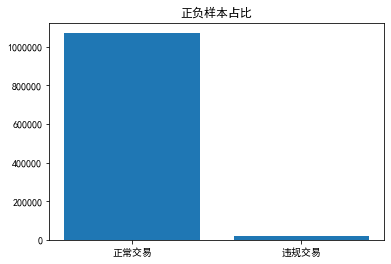

In [8]:
def draw_all_class_radio(data):
    count_classes = pd.value_counts(data['未来12个月是否违规'], sort=True).sort_index()
    N = np.sum(count_classes.values)
    non_fraud, fraud = count_classes.values
    print('正常交易：{}笔，占比为：{:.2%}'.format(non_fraud, non_fraud / N))
    print('违规交易：{}笔，占比为：{:.2%}'.format(fraud, fraud / N))
    plt.bar(x=['正常交易', '违规交易'], height=count_classes.values)
    plt.title('正负样本占比')
    plt.show()
draw_all_class_radio(data)

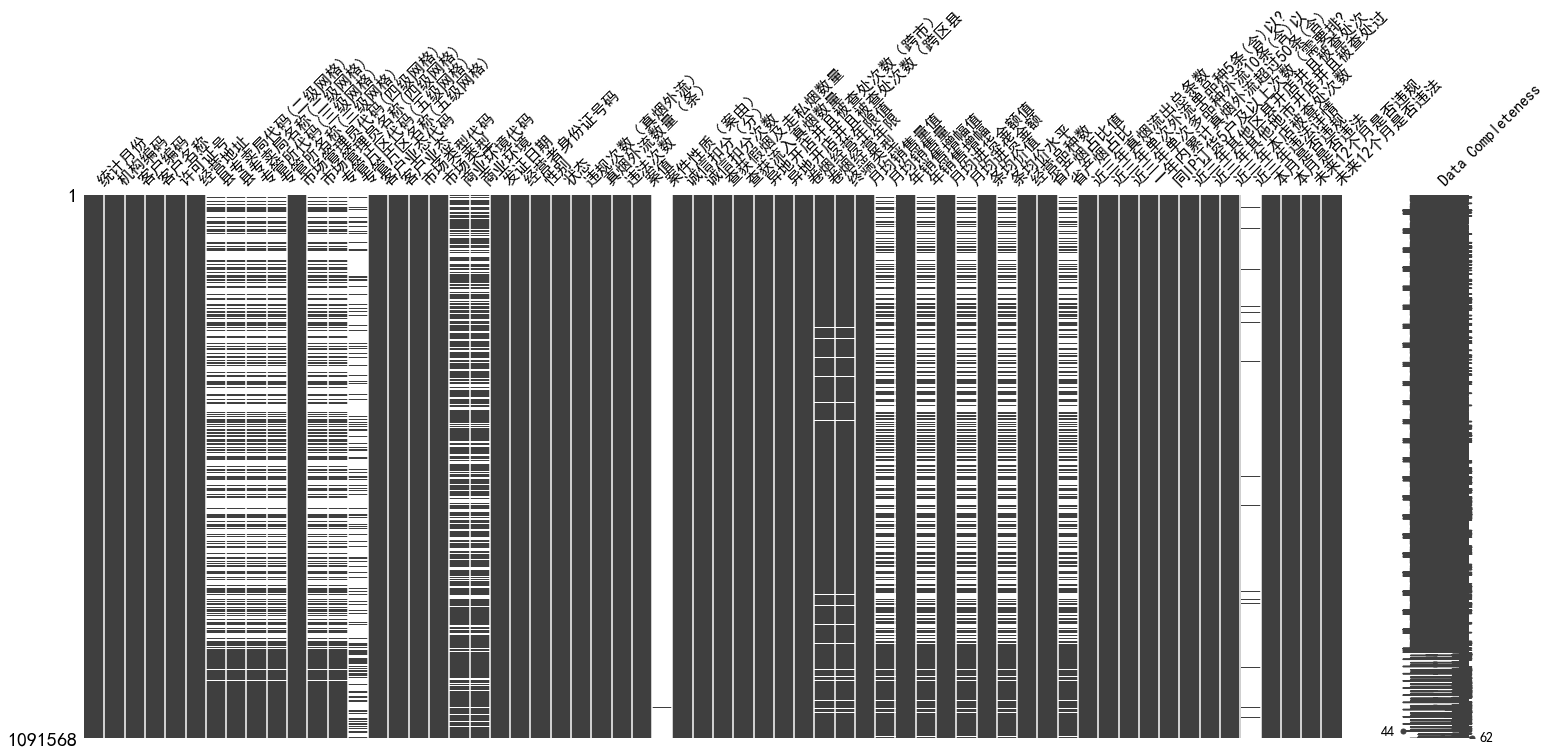

In [9]:
#查看缺省值
def draw_has_none(data):
    msno.matrix(data,labels=True)
    plt.show()
draw_has_none(data)

In [10]:
#删除缺省值较多的数据
data_notnull = data.drop(['县专卖局代码(二级网格)','县专卖局名称(二级网格)','专管所代码(三级网格)','专管所名称(三级网格)','市场管理员名称(四级网格)','专管片区代码(五级网格)','专管片区名称(五级网格)','案件性质（案由）','近三年违法详情'],axis=1)

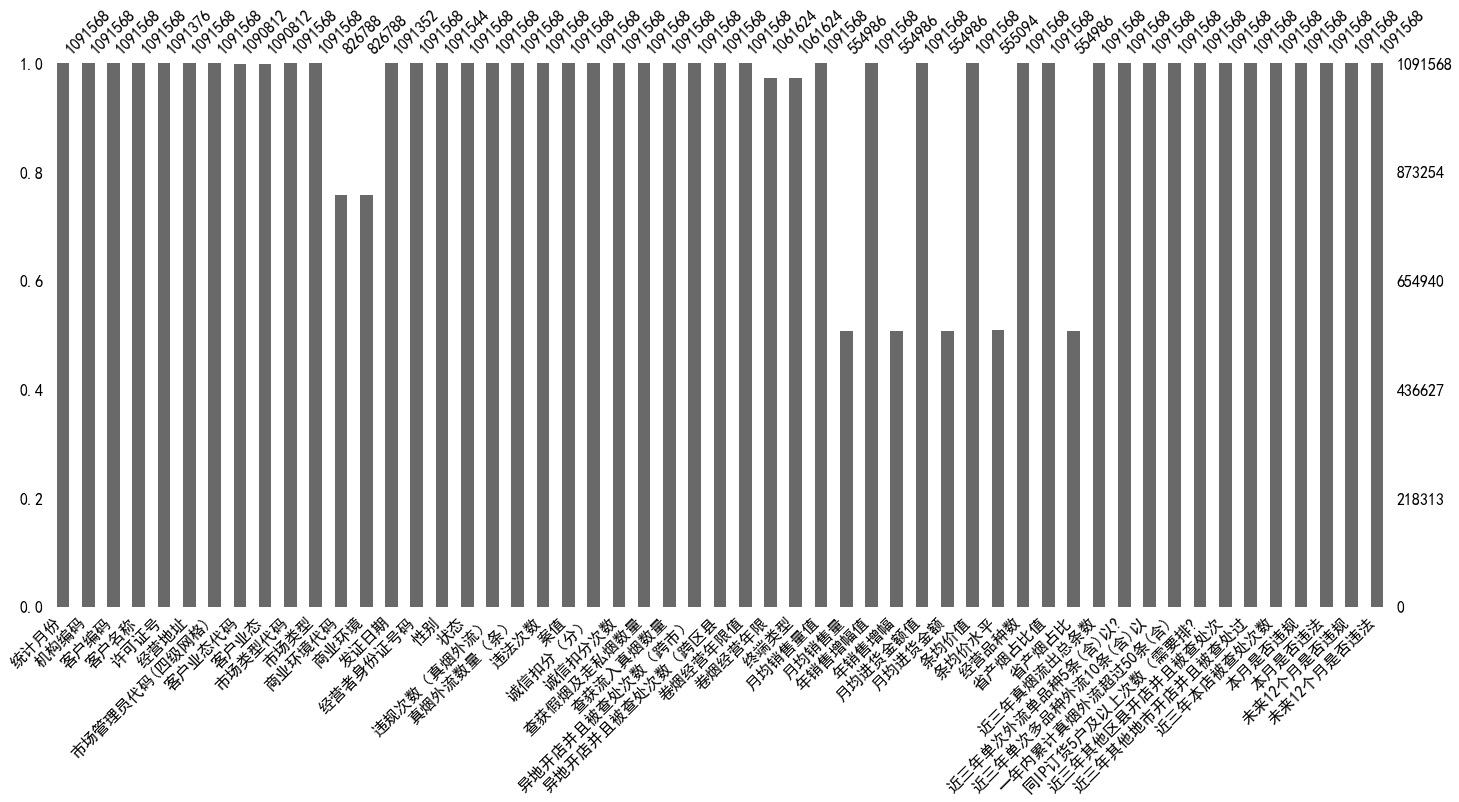

In [11]:
msno.bar(data_notnull,labels=True)

商业环境代码、商业环境暂时没有好的补充缺失值的方法，因此暂时舍弃

In [12]:
#缺省值处理
#商业环境代码、商业环境确实值暂时删除
data_notnull = data_notnull.drop(['商业环境代码','商业环境'],axis=1)

In [13]:
#查看其它缺省值，并做对应的缺失值处理和数据转换。

In [14]:
for i in list(data_notnull.columns):
    a= len(data_notnull[data_notnull[i].notnull()])
    if a <1091568:
        print(i,1091568-a)

许可证号 192
客户业态代码 756
客户业态 756
发证日期 216
性别 24
卷烟经营年限 29944
终端类型 29944
月均销售量 536582
年销售增幅 536582
月均进货金额 536582
条均价水平 536474
省产烟占比 536582


通过观察数据删除不需要进行缺失值补充的列

In [15]:
#许可证号、客户业态、发证日期、终端类型四个特征可直接删除
data_notnull = data_notnull.drop(['许可证号','客户业态','发证日期','终端类型'],axis=1)


客户业态代码处理

In [16]:
#同一个客户其他月份的业态代码补充
for i in list(set(data_notnull[data_notnull['客户业态代码'].isnull()]['客户名称'])):
    if i in list(set(data_notnull[data_notnull['客户业态代码'].notnull()]['客户名称'])):
        data_notnull.loc[data_notnull[(data_notnull['客户业态代码'].isnull())&(data_notnull['客户名称']==i)].index,'客户业态代码']=list(set(data_notnull[(data_notnull['客户名称']==i)&(data_notnull['客户业态代码'].notnull())]['客户业态代码']))
        print(f'{i}对应的客户业态代码更新完成')

仙游县枫亭镇豪美便利店对应的客户业态代码更新完成
仙游县鲤南欣悦便利店对应的客户业态代码更新完成
莆田市秀屿区东峤何金花食杂店对应的客户业态代码更新完成
仙游县鲤南易太便利仙站店对应的客户业态代码更新完成
莆田市秀屿区月塘潘爱玉百货店对应的客户业态代码更新完成
莆田市秀屿区埭头流星雨食杂店对应的客户业态代码更新完成
中国石油天然气股份有限公司福建莆田仙游枫亭加油站对应的客户业态代码更新完成
莆田市凤凰百货有限公司北高店对应的客户业态代码更新完成
莆田市荔城区京东绿色便利店对应的客户业态代码更新完成
莆田市城厢区乐佳家超市对应的客户业态代码更新完成
莆田市城厢区鑫鑫鑫食杂店对应的客户业态代码更新完成
莆田市荔城区新度镇吓鹏食杂店对应的客户业态代码更新完成
仙游县盖尾镇信达通讯商店对应的客户业态代码更新完成


<BarContainer object of 19 artists>

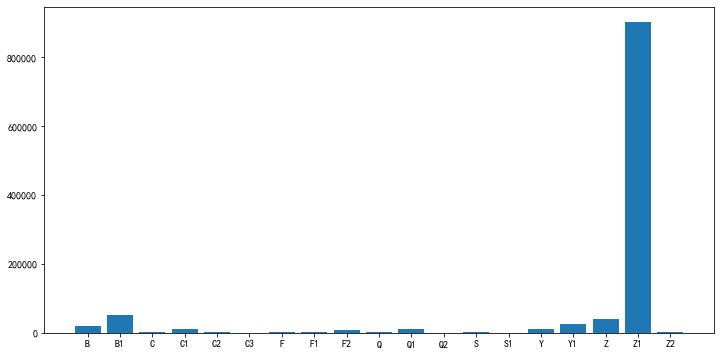

In [17]:
#对于任然存在缺失的数据，观察其统计值
aa=data_notnull[data_notnull['客户业态代码'].notnull()]
b=pd.DataFrame(sorted(Counter(aa['客户业态代码']).items()))
x=b.iloc[:,0]
y=b.iloc[:,1]
plt.figure(figsize=(12,6))
plt.bar(x,y)

In [19]:
#从统计值中可以看出，Z1占了大数，因此缺失值均填充为Z1
data_notnull.loc[data_notnull[data_notnull['客户业态代码'].isnull()].index,'客户业态代码']='Z1'

常见的特征编码方法：  
1、one-hot encoding   
2、label encoding  
3、count encoding    
4、Targetmean encoding    
5、实体嵌入  

尝试使用one-hot进行特征编码

In [20]:
#对客户业态代码进行特征编码
#观察数据，发现客户业态代码之间的顺序和优先级不是很明显，因此这里先使用one-hot编码

one_hot_cus=pd.get_dummies(data_notnull['客户业态代码'],drop_first=False)

In [21]:
one_hot_cus

,B,B1,C,C1,C2,C3,F,F1,F2,Q,Q1,Q2,S,S1,Y,Y1,Z,Z1,Z2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1091564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1091565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1091566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
data_notnull=data_notnull.join(one_hot_cus)

性别

In [23]:
data_notnull.loc[data_notnull[data_notnull['性别'].isnull()].index,'性别']='男'

In [24]:
data_notnull=data_notnull.join(pd.get_dummies(data_notnull['性别']))

卷烟经验年限

In [25]:
#观察发现卷烟经验年限缺失数对应的年限值均为0，因此赋值为‘2年以下’
data_notnull.loc[data_notnull[data_notnull['卷烟经营年限'].isnull()].index,'卷烟经营年限']='2年以下'

In [26]:
#做onehot编码
data_notnull=data_notnull.join(pd.get_dummies(data_notnull['卷烟经营年限']))

In [27]:
for i in list(data_notnull.columns):
    a= len(data_notnull[data_notnull[i].notnull()])
    if a <1091568:
        print(i,1091568-a)

月均销售量 536582
年销售增幅 536582
月均进货金额 536582
条均价水平 536474
省产烟占比 536582


月均销售量


In [28]:
#通过观察‘月均销售量’为空的数据对于的销售量值均为0，因此对应的值为低（4件以下）
data_notnull.loc[data_notnull[data_notnull['月均销售量'].isnull()].index,'月均销售量']='月均销售量0'

In [29]:
#做one-hot编码
data_notnull=data_notnull.join(pd.get_dummies(data_notnull['月均销售量']))

年销售增幅

In [30]:
data_notnull.loc[data_notnull[data_notnull['年销售增幅'].isnull()].index,'年销售增幅']='年销售增幅为0'

In [31]:
#做one-hot编码
data_notnull=data_notnull.join(pd.get_dummies(data_notnull['年销售增幅']))

月均进货金额

In [33]:
data_notnull.loc[data_notnull[data_notnull['月均进货金额'].isnull()].index,'月均进货金额']='月均进货金额为0'
data_notnull=data_notnull.join(pd.get_dummies(data_notnull['月均进货金额']))

条均价水平

In [34]:
data_notnull.loc[data_notnull[data_notnull['条均价水平'].isnull()].index,'条均价水平']='条均价为0'
data_notnull=data_notnull.join(pd.get_dummies(data_notnull['条均价水平']))

省产烟占比

In [35]:
data_notnull.loc[data_notnull[data_notnull['省产烟占比'].isnull()].index,'省产烟占比']='占比为0'
data_notnull=data_notnull.join(pd.get_dummies(data_notnull['省产烟占比']))

In [36]:
for i in list(data_notnull.columns):
    a= len(data_notnull[data_notnull[i].notnull()])
    if a <1091568:
        print(i,1091568-a)

统计月份处理

In [37]:
data_notnull['year']=data_notnull['统计月份'].apply(lambda x :int(x/100))

In [38]:
data_notnull['统计月份']=data_notnull['统计月份'].apply(lambda x: x%100)

## 不必要特征删除

In [49]:
data_notnull.columns

Index(['统计月份', '机构编码', '客户编码', '客户名称', '经营地址', '市场管理员代码(四级网格)', '客户业态代码',
       '市场类型代码', '市场类型', '经营者身份证号码', '性别', '状态', '违规次数（真烟外流）', '真烟外流数量（条）',
       '违法次数', '案值', '诚信扣分（分）', '诚信扣分次数', '查获假烟及走私烟数量', '查获流入真烟数量',
       '异地开店并且被查处次数（跨市）', '异地开店并且被查处次数（跨区县', '卷烟经营年限值', '卷烟经营年限', '月均销售量值',
       '月均销售量', '年销售增幅值', '年销售增幅', '月均进货金额值', '月均进货金额', '条均价值', '条均价水平',
       '经营品种数', '省产烟占比值', '省产烟占比', '近三年真烟流出总条数', '近三年单次外流单品种5条(含)以?',
       '近三年单次多品种外流10条(含)以', '一年内累计真烟外流超过50条(含)', '同IP订货5户及以上次数（需要排?',
       '近三年其他区县开店并且被查处次', '近三年其他地市开店并且被查处过', '近三年本店被查处次数', '本月是否违规', '本月是否违法',
       '未来12个月是否违规', '未来12个月是否违法', 'B', 'B1', 'C', 'C1', 'C2', 'C3', 'F', 'F1',
       'F2', 'Q', 'Q1', 'Q2', 'S', 'S1', 'Y', 'Y1', 'Z', 'Z1', 'Z2', '女', '男',
       '2-5年', '2年以下', '5年以上', '中高（10-15件）', '中（4-10件）', '低（4件以下）', '月均销售量0',
       '高（15件以上）', '中（3-10%）', '年销售增幅为0', '快（10%-30%）', '慢（3%以下）',
       '爆发性增长（30%以上）', '1-5万', '10万以上', '1万以下', '5-10万', '月均进货金额为0',
       '中（100-120元/条）', '低（100元/条）', '条均价

In [80]:
data_use = data_notnull.drop(['机构编码','客户编码','客户名称','经营地址','市场管理员代码(四级网格)','经营者身份证号码'],axis=1)

In [88]:
a=list(data_use.columns)
a

['统计月份',
 '违规次数（真烟外流）',
 '真烟外流数量（条）',
 '违法次数',
 '案值',
 '诚信扣分（分）',
 '诚信扣分次数',
 '查获假烟及走私烟数量',
 '查获流入真烟数量',
 '异地开店并且被查处次数（跨区县',
 '月均进货金额',
 '经营品种数',
 '省产烟占比值',
 '近三年真烟流出总条数',
 '近三年单次外流单品种5条(含)以?',
 '近三年单次多品种外流10条(含)以',
 '一年内累计真烟外流超过50条(含)',
 '近三年其他区县开店并且被查处次',
 '近三年本店被查处次数',
 '本月是否违规',
 '本月是否违法',
 '未来12个月是否违规',
 '未来12个月是否违法',
 'B',
 'B1',
 'C',
 'C1',
 'C2',
 'C3',
 'F',
 'F1',
 'F2',
 'Q',
 'Q1',
 'Q2',
 'S',
 'S1',
 'Y',
 'Y1',
 'Z',
 'Z1',
 'Z2',
 '女',
 '男',
 '2-5年',
 '2年以下',
 '5年以上',
 '中高（10-15件）',
 '中（4-10件）',
 '低（4件以下）',
 '月均销售量0',
 '高（15件以上）',
 '中（3-10%）',
 '年销售增幅为0',
 '快（10%-30%）',
 '慢（3%以下）',
 '爆发性增长（30%以上）',
 '1-5万',
 '10万以上',
 '1万以下',
 '5-10万',
 '月均进货金额为0',
 '中（100-120元/条）',
 '低（100元/条）',
 '条均价为0',
 '高（120元/条以上）',
 '中（40-60%）',
 '低（40%以下）',
 '占比为0',
 '高（60%以上）',
 'year',
 '乡村',
 '其他',
 '城区',
 '城郊',
 '城镇',
 '海岛',
 '行政村',
 '行政村:边远',
 '镇区',
 'B_right',
 'D',
 'G',
 'P',
 'TE']

市场业态代码处理


In [82]:
data_use=data_use.join(pd.get_dummies(data_use['市场类型']))

状态处理

In [83]:
data_use=data_use.join(pd.get_dummies(data_use['状态']),rsuffix = '_right')

In [85]:
data_use = data_use.drop(['客户业态代码','市场类型代码','市场类型','性别','状态','异地开店并且被查处次数（跨市）','卷烟经营年限值','卷烟经营年限','月均销售量','月均销售量值','年销售增幅值','年销售增幅','月均进货金额值','条均价水平','条均价值','省产烟占比','同IP订货5户及以上次数（需要排?','近三年其他地市开店并且被查处过','月均进货金额'],axis=1)

In [86]:
data_use.head(10)

,统计月份,违规次数（真烟外流）,真烟外流数量（条）,违法次数,案值,诚信扣分（分）,诚信扣分次数,查获假烟及走私烟数量,查获流入真烟数量,异地开店并且被查处次数（跨区县,月均进货金额,经营品种数,省产烟占比值,近三年真烟流出总条数,近三年单次外流单品种5条(含)以?,近三年单次多品种外流10条(含)以,一年内累计真烟外流超过50条(含),近三年其他区县开店并且被查处次,近三年本店被查处次数,本月是否违规,本月是否违法,未来12个月是否违规,未来12个月是否违法,B,B1,C,C1,C2,C3,F,F1,F2,Q,Q1,Q2,S,S1,Y,Y1,Z,Z1,Z2,女,男,2-5年,2年以下,5年以上,中高（10-15件）,中（4-10件）,低（4件以下）,月均销售量0,高（15件以上）,中（3-10%）,年销售增幅为0,快（10%-30%）,慢（3%以下）,爆发性增长（30%以上）,1-5万,10万以上,1万以下,5-10万,月均进货金额为0,中（100-120元/条）,低（100元/条）,条均价为0,高（120元/条以上）,中（40-60%）,低（40%以下）,占比为0,高（60%以上）,year,乡村,其他,城区,城郊,城镇,海岛,行政村,行政村:边远,镇区,B_right,D,G,P,TE
0,1,0,0.0,0,0.0,0,0,0.0,0.0,0,月均进货金额为0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2018,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,0,0.0,0,0.0,0,0,0.0,0.0,0,10万以上,124,0.601827,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2018,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0.0,0,0.0,0,0,0.0,0.0,0,月均进货金额为0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2018,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,0,0.0,0,0.0,0,0,0.0,0.0,0,月均进货金额为0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2018,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0.0,0,0.0,0,0,0.0,0.0,0,10万以上,53,0.660142,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5,1,0,0.0,0,0.0,0,0,0.0,0.0,0,月均进货金额为0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2018,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6,1,0,0.0,0,0.0,0,0,0.0,0.0,0,月均进货金额为0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2018,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7,1,0,0.0,0,0.0,0,0,0.0,0.0,0,10万以上,140,0.684129,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,2018,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8,1,0,0.0,0,0.0,0,0,0.0,0.0,0,10万以上,72,0.688001,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2018,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9,1,0,0.0,0,0.0,0,0,0.0,0.0,0,10万以上,187,0.713618,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,2018,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [90]:
data_use=data_use.drop('月均进货金额',axis=1)

## 数据标准化

In [91]:
data_use.columns

Index(['统计月份', '违规次数（真烟外流）', '真烟外流数量（条）', '违法次数', '案值', '诚信扣分（分）', '诚信扣分次数',
       '查获假烟及走私烟数量', '查获流入真烟数量', '异地开店并且被查处次数（跨区县', '经营品种数', '省产烟占比值',
       '近三年真烟流出总条数', '近三年单次外流单品种5条(含)以?', '近三年单次多品种外流10条(含)以',
       '一年内累计真烟外流超过50条(含)', '近三年其他区县开店并且被查处次', '近三年本店被查处次数', '本月是否违规',
       '本月是否违法', '未来12个月是否违规', '未来12个月是否违法', 'B', 'B1', 'C', 'C1', 'C2', 'C3',
       'F', 'F1', 'F2', 'Q', 'Q1', 'Q2', 'S', 'S1', 'Y', 'Y1', 'Z', 'Z1', 'Z2',
       '女', '男', '2-5年', '2年以下', '5年以上', '中高（10-15件）', '中（4-10件）', '低（4件以下）',
       '月均销售量0', '高（15件以上）', '中（3-10%）', '年销售增幅为0', '快（10%-30%）', '慢（3%以下）',
       '爆发性增长（30%以上）', '1-5万', '10万以上', '1万以下', '5-10万', '月均进货金额为0',
       '中（100-120元/条）', '低（100元/条）', '条均价为0', '高（120元/条以上）', '中（40-60%）',
       '低（40%以下）', '占比为0', '高（60%以上）', 'year', '乡村', '其他', '城区', '城郊', '城镇',
       '海岛', '行政村', '行政村:边远', '镇区', 'B_right', 'D', 'G', 'P', 'TE'],
      dtype='object')

In [92]:
#需要进行标准化的特征,将值映射到0到1之间
x_feature  = ['统计月份', '违规次数（真烟外流）', '真烟外流数量（条）', '违法次数', '案值', '诚信扣分（分）', '诚信扣分次数',
       '查获假烟及走私烟数量', '查获流入真烟数量', '异地开店并且被查处次数（跨区县', '经营品种数', '省产烟占比值',
       '近三年真烟流出总条数', '近三年单次外流单品种5条(含)以?', '近三年单次多品种外流10条(含)以',
       '一年内累计真烟外流超过50条(含)', '近三年其他区县开店并且被查处次', '近三年本店被查处次数', '本月是否违规',
       '本月是否违法']

In [93]:
from sklearn.preprocessing import MinMaxScaler
data_use[x_feature]=MinMaxScaler().fit_transform(data_use[x_feature])

In [94]:
data_use

,统计月份,违规次数（真烟外流）,真烟外流数量（条）,违法次数,案值,诚信扣分（分）,诚信扣分次数,查获假烟及走私烟数量,查获流入真烟数量,异地开店并且被查处次数（跨区县,经营品种数,省产烟占比值,近三年真烟流出总条数,近三年单次外流单品种5条(含)以?,近三年单次多品种外流10条(含)以,一年内累计真烟外流超过50条(含),近三年其他区县开店并且被查处次,近三年本店被查处次数,本月是否违规,本月是否违法,未来12个月是否违规,未来12个月是否违法,B,B1,C,C1,C2,C3,F,F1,F2,Q,Q1,Q2,S,S1,Y,Y1,Z,Z1,Z2,女,男,2-5年,2年以下,5年以上,中高（10-15件）,中（4-10件）,低（4件以下）,月均销售量0,高（15件以上）,中（3-10%）,年销售增幅为0,快（10%-30%）,慢（3%以下）,爆发性增长（30%以上）,1-5万,10万以上,1万以下,5-10万,月均进货金额为0,中（100-120元/条）,低（100元/条）,条均价为0,高（120元/条以上）,中（40-60%）,低（40%以下）,占比为0,高（60%以上）,year,乡村,其他,城区,城郊,城镇,海岛,行政村,行政村:边远,镇区,B_right,D,G,P,TE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2018,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442857,0.601827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2018,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2018,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2018,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189286,0.660142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,2018,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091563,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2020,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1091564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2020,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1091565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2020,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1091566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2020,0,1,0,0,0,0,0,0,0,0,1,0,0,0


## 特征选择

In [97]:
x_feature =['统计月份', '违规次数（真烟外流）', '真烟外流数量（条）', '违法次数', '案值', '诚信扣分（分）', '诚信扣分次数',
       '查获假烟及走私烟数量', '查获流入真烟数量', '异地开店并且被查处次数（跨区县', '经营品种数', '省产烟占比值',
       '近三年真烟流出总条数', '近三年单次外流单品种5条(含)以?', '近三年单次多品种外流10条(含)以',
       '一年内累计真烟外流超过50条(含)', '近三年其他区县开店并且被查处次', '近三年本店被查处次数', '本月是否违规',
       '本月是否违法', 'B', 'B1', 'C', 'C1', 'C2', 'C3',
       'F', 'F1', 'F2', 'Q', 'Q1', 'Q2', 'S', 'S1', 'Y', 'Y1', 'Z', 'Z1', 'Z2',
       '女', '男', '2-5年', '2年以下', '5年以上', '中高（10-15件）', '中（4-10件）', '低（4件以下）',
       '月均销售量0', '高（15件以上）', '中（3-10%）', '年销售增幅为0', '快（10%-30%）', '慢（3%以下）',
       '爆发性增长（30%以上）', '1-5万', '10万以上', '1万以下', '5-10万', '月均进货金额为0',
       '中（100-120元/条）', '低（100元/条）', '条均价为0', '高（120元/条以上）', '中（40-60%）',
       '低（40%以下）', '占比为0', '高（60%以上）', '乡村', '其他', '城区', '城郊', '城镇',
       '海岛', '行政村', '行政村:边远', '镇区', 'B_right', 'D', 'G', 'P', 'TE']

In [100]:
len(x_feature)

81

D:\install\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\install\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


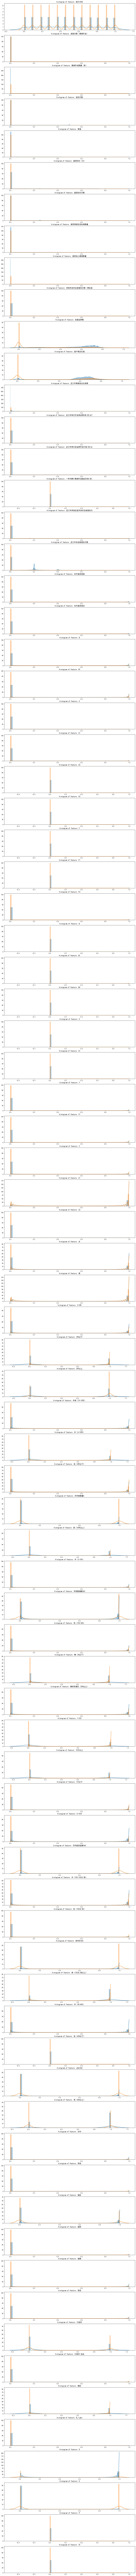

In [101]:
from matplotlib import gridspec
plt.figure(figsize=(16,81*4))
gs = gridspec.GridSpec(81, 1)
for i, cn in enumerate(data_use[x_feature]):
    ax = plt.subplot(gs[i])
#     sns.distplot(data_notnull[cn][data_notnull["未来12个月是否违规"] == 1], bins=50)
#     sns.distplot(data_notnull[cn][data_notnull["未来12个月是否违规"] == 0], bins=100)
    sns.distplot(data_use[cn][data_use["未来12个月是否违法"] == 1], bins=50)
    sns.distplot(data_use[cn][data_use["未来12个月是否违法"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

In [104]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [105]:
x_values=data_use[x_feature]
y_values=data_use['未来12个月是否违规']
#调用LassoCV函数，并进行交叉验证，默认cv=3
model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.0005]).fit(x_values, y_values)
#输出看模型最终选择了几个特征向量，剔除了几个特征向量
coef = pd.Series(model_lasso.coef_, index = x_feature)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 70 variables


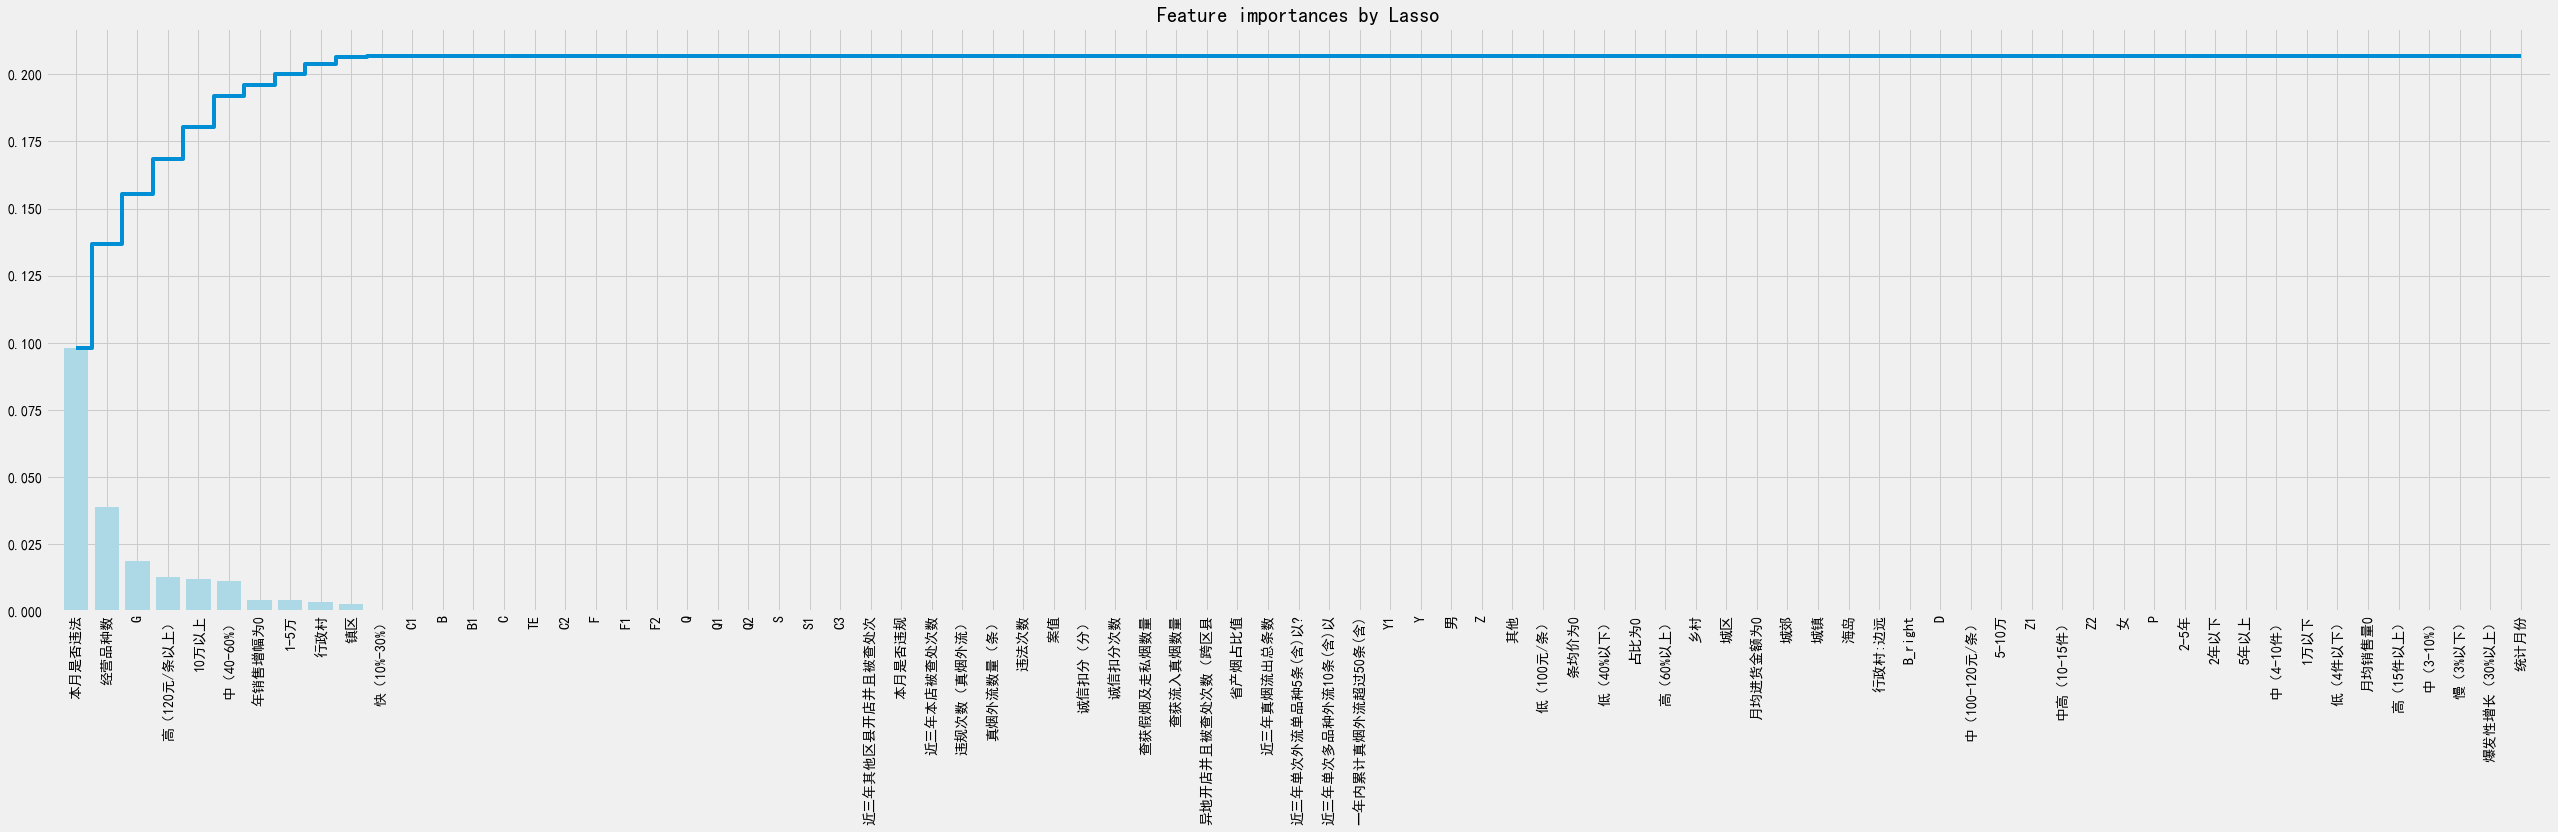

In [110]:
#可视化变量的重要性程度
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  #其中的一种主题，可以通过plt.style.availabel查看有多少种主题
names = data_use[x_feature].columns
importances = np.abs(model_lasso.coef_)
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(40,10))
plt.title("Feature importances by Lasso")

plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [154]:
Las_feature=['本月是否违法','经营品种数','G','高（120元/条以上）','10万以上','中（40-60%）','年销售增幅为0','1-5万','行政村','镇区','快（10%-30%）']

选择的特征包括['本月是否违法','经营品种数','G','高（120元/条以上）','10万以上','中（40-60%）','年销售增幅为0','1-5万','行政村','镇区','快（10%-30%）']

In [155]:
#利用随机森林的feature importance对特征的重要性进行排序
from sklearn.ensemble import RandomForestClassifier
names = data_use[x_feature].columns
clf=RandomForestClassifier(n_estimators=10,random_state=42)#构建分类随机森林分类器
clf.fit(x_values, y_values) #对自变量和因变量进行拟合

RandomForestClassifier(n_estimators=10, random_state=42)

In [156]:
for feature in zip(names, clf.feature_importances_):
    print(feature)

('统计月份', 0.0837112081944719)
('违规次数（真烟外流）', 0.0018482920130626053)
('真烟外流数量（条）', 0.0016774534219298049)
('违法次数', 0.005526940804631408)
('案值', 0.011003007513550229)
('诚信扣分（分）', 0.0018148751294577814)
('诚信扣分次数', 0.0017974678684172)
('查获假烟及走私烟数量', 0.005915098816070374)
('查获流入真烟数量', 0.000362678484749693)
('异地开店并且被查处次数（跨区县', 0.0005163381682144484)
('经营品种数', 0.25651234423891184)
('省产烟占比值', 0.36198602513407246)
('近三年真烟流出总条数', 0.01219863572631335)
('近三年单次外流单品种5条(含)以?', 0.0008881130340713546)
('近三年单次多品种外流10条(含)以', 0.0003214847792189749)
('一年内累计真烟外流超过50条(含)', 0.0)
('近三年其他区县开店并且被查处次', 0.005887574825855417)
('近三年本店被查处次数', 0.01770573610581772)
('本月是否违规', 0.0021596727095472986)
('本月是否违法', 0.0029777394236405645)
('B', 0.0037562563976561046)
('B1', 0.005200649276648941)
('C', 9.505953262601904e-05)
('C1', 0.0015910821859494466)
('C2', 0.00016763042513108273)
('C3', 0.0)
('F', 1.5188582272553764e-05)
('F1', 7.547836412649915e-05)
('F2', 0.0015760754240044558)
('Q', 0.00041728689580671147)
('Q1', 0.0009

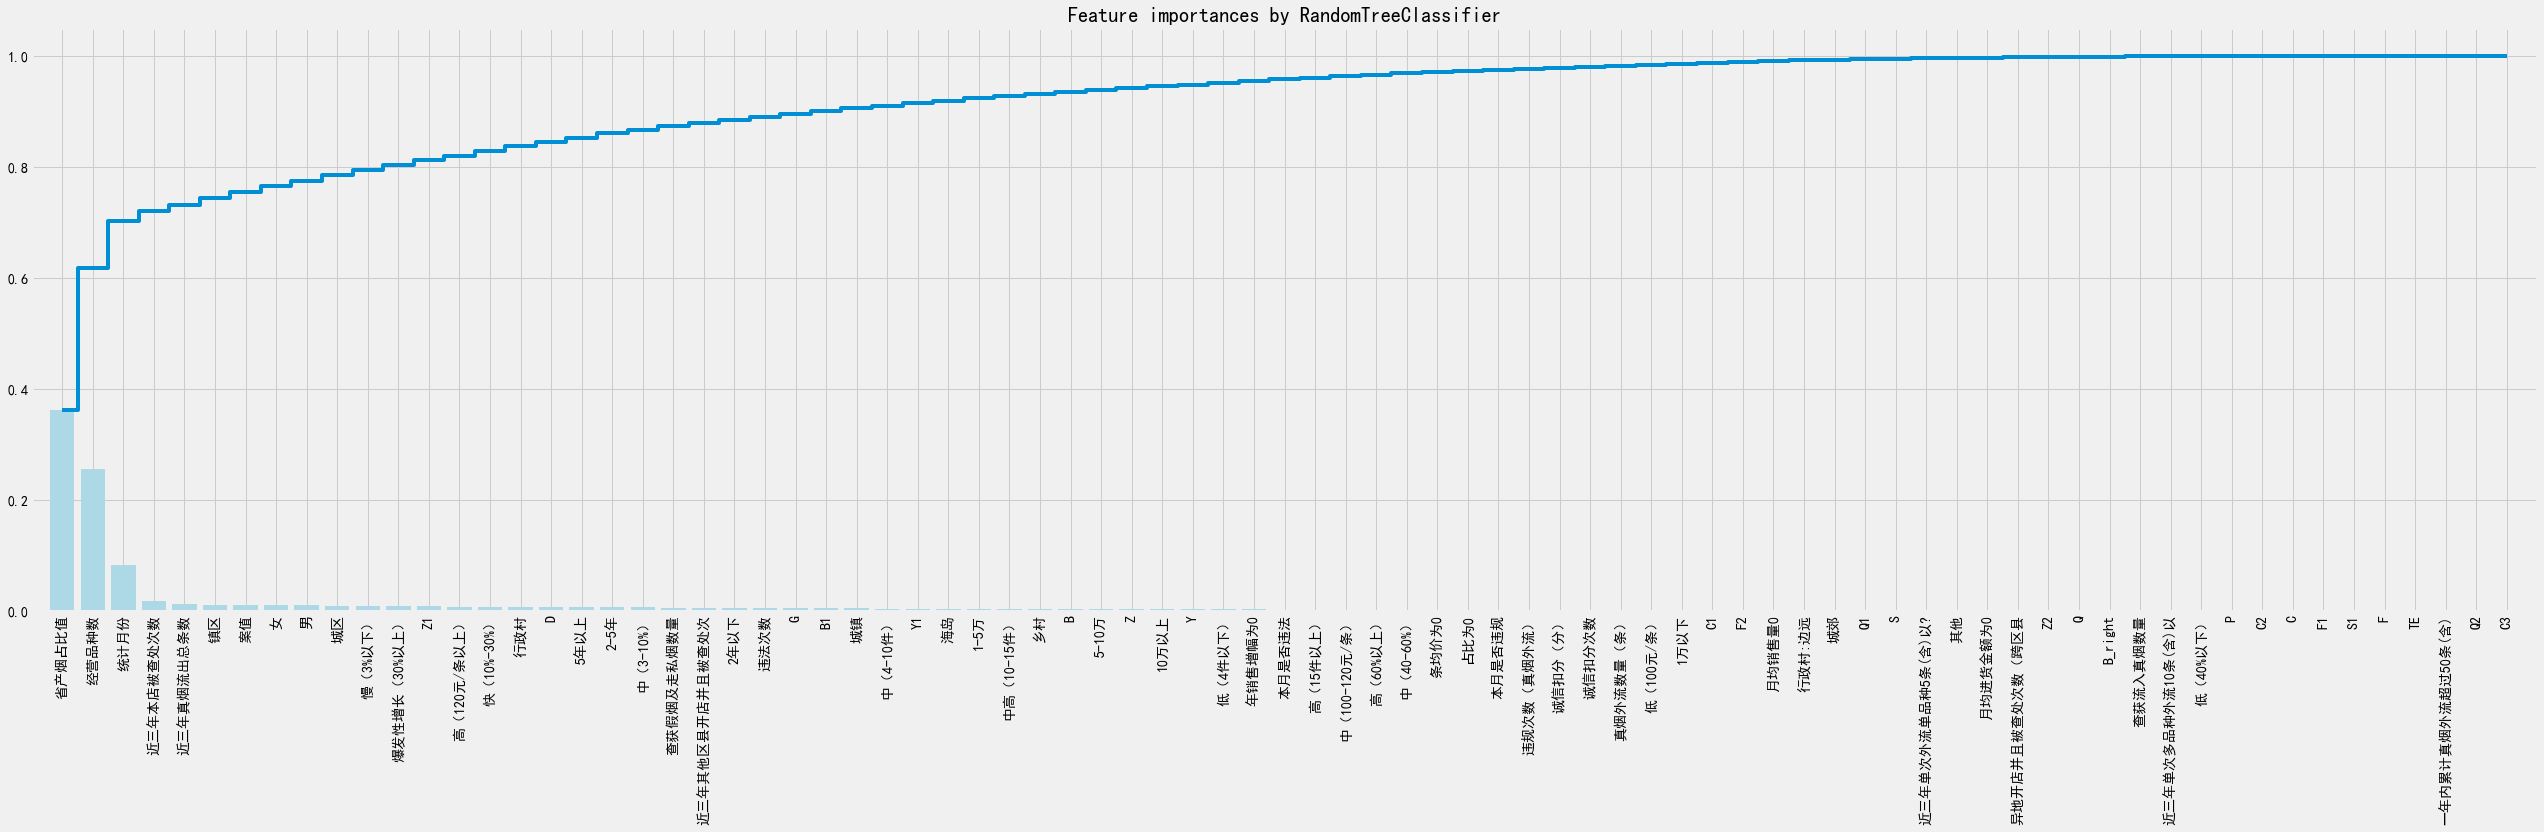

In [157]:
#可视化由随机森林分类器判定的各类的重要顺序
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')#其中的一种主题，可以通过plt.style.availabel查看有多少种主题
#plt.rcParams['figure.figsize'] = (12,6)#设置画布尺寸
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]#按照重要顺序从小到大排序并获取逆序索引
fig = plt.figure(figsize=(40,10))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [159]:
rf_feature=names[indices[0:59]]
rf_feature

Index(['省产烟占比值', '经营品种数', '统计月份', '近三年本店被查处次数', '近三年真烟流出总条数', '镇区', '案值', '女',
       '男', '城区', '慢（3%以下）', '爆发性增长（30%以上）', 'Z1', '高（120元/条以上）', '快（10%-30%）',
       '行政村', 'D', '5年以上', '2-5年', '中（3-10%）', '查获假烟及走私烟数量', '近三年其他区县开店并且被查处次',
       '2年以下', '违法次数', 'G', 'B1', '城镇', '中（4-10件）', 'Y1', '海岛', '1-5万',
       '中高（10-15件）', '乡村', 'B', '5-10万', 'Z', '10万以上', 'Y', '低（4件以下）',
       '年销售增幅为0', '本月是否违法', '高（15件以上）', '中（100-120元/条）', '高（60%以上）',
       '中（40-60%）', '条均价为0', '占比为0', '本月是否违规', '违规次数（真烟外流）', '诚信扣分（分）',
       '诚信扣分次数', '真烟外流数量（条）', '低（100元/条）', '1万以下', 'C1', 'F2', '月均销售量0',
       '行政村:边远', '城郊'],
      dtype='object')

In [116]:
#使用GBDT来完成特征选择
from sklearn.ensemble import GradientBoostingClassifier 
gdbt_model =GradientBoostingClassifier(random_state=42)
gdbt_model.fit(x_values, y_values)

GradientBoostingClassifier(random_state=42)

In [117]:
for feature in zip(names, gdbt_model.feature_importances_):
    print(feature)

('统计月份', 0.013953615614648744)
('违规次数（真烟外流）', 0.003080402744592715)
('真烟外流数量（条）', 0.0301987389230763)
('违法次数', 0.06067625213951776)
('案值', 0.0025748703896608083)
('诚信扣分（分）', 0.009471216490631816)
('诚信扣分次数', 0.00023896440162950178)
('查获假烟及走私烟数量', 0.0017829525622447947)
('查获流入真烟数量', 0.0004155273842867124)
('异地开店并且被查处次数（跨区县', 0.0)
('经营品种数', 0.32383354577563156)
('省产烟占比值', 0.10929294825696996)
('近三年真烟流出总条数', 0.010335118209498877)
('近三年单次外流单品种5条(含)以?', 0.0)
('近三年单次多品种外流10条(含)以', 0.0)
('一年内累计真烟外流超过50条(含)', 0.0)
('近三年其他区县开店并且被查处次', 0.006600843011755408)
('近三年本店被查处次数', 0.07827953001025907)
('本月是否违规', 2.3971427461865907e-05)
('本月是否违法', 0.007710211200779542)
('B', 0.0016927349411866533)
('B1', 0.0009011445889077141)
('C', 0.0)
('C1', 0.000657379780180015)
('C2', 0.0)
('C3', 0.0)
('F', 0.0)
('F1', 0.0)
('F2', 0.001680519181512934)
('Q', 0.00040258529367090835)
('Q1', 0.0)
('Q2', 0.0)
('S', 0.013019007282514681)
('S1', 0.0)
('Y', 0.0008959464336658369)
('Y1', 0.0)
('Z', 0.0003648742940590572)
('Z1

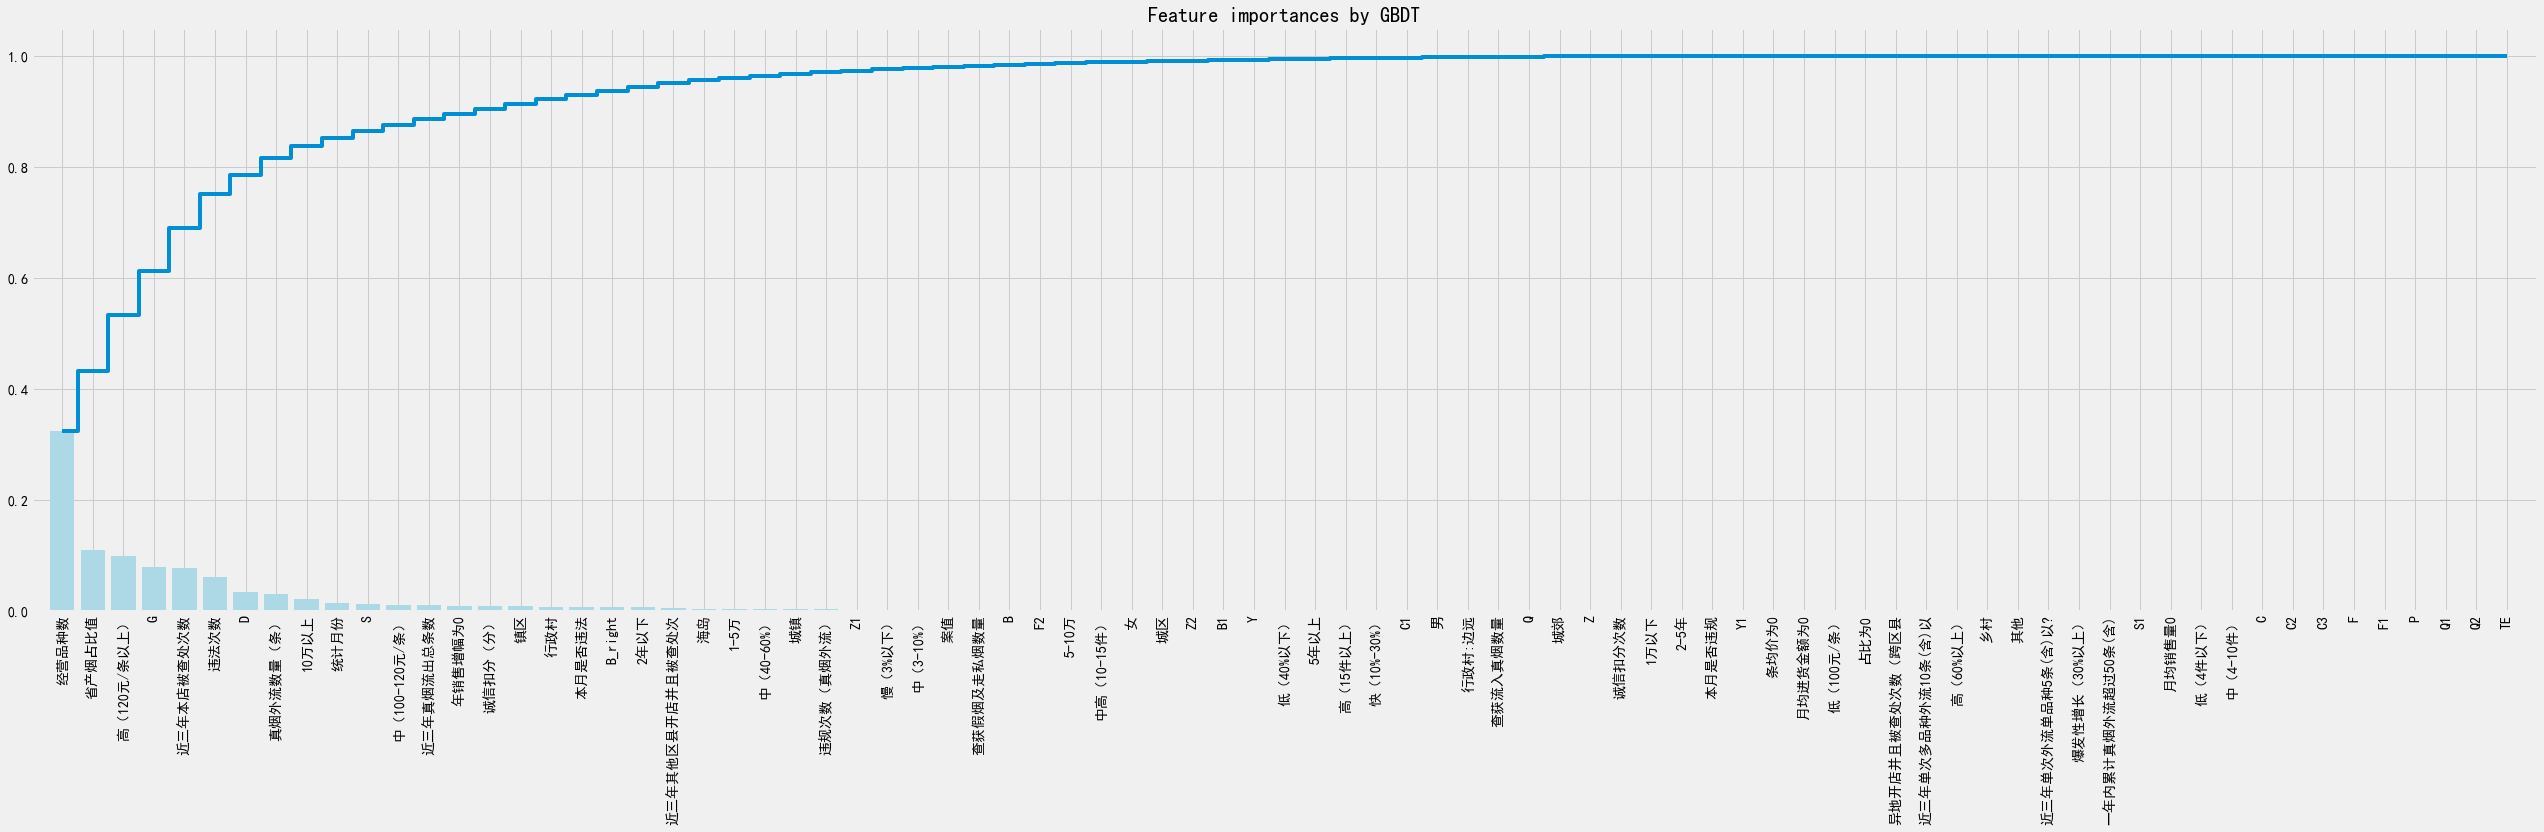

In [121]:
#可视化由GBDT判定的各类的重要顺序
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')#其中的一种主题，可以通过plt.style.availabel查看有多少种主题
#plt.rcParams['figure.figsize'] = (40,10)#设置画布尺寸
importances = gdbt_model.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]#按照重要顺序从小到大排序并获取逆序索引
fig = plt.figure(figsize=(40,10))
plt.title("Feature importances by GBDT")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [153]:
GBDT_feature=names[indices[0:26]]
GBDT_feature

Index(['经营品种数', '省产烟占比值', '高（120元/条以上）', 'G', '近三年本店被查处次数', '违法次数', 'D',
       '真烟外流数量（条）', '10万以上', '统计月份', 'S', '中（100-120元/条）', '近三年真烟流出总条数',
       '年销售增幅为0', '诚信扣分（分）', '镇区', '行政村', '本月是否违法', 'B_right', '2年以下',
       '近三年其他区县开店并且被查处次', '海岛', '1-5万', '中（40-60%）', '城镇', '违规次数（真烟外流）'],
      dtype='object')

## 划分训练集和测试集

In [165]:
X_train = data_use[data_use['year']<2020][x_feature]

In [181]:
y_train = data_use[data_use['year']<2020]['未来12个月是否违规']

In [167]:
X_test=data_use[data_use['year']>=2020][x_feature]

In [168]:
y_test = data_use[data_use['year']>=2020]['未来12个月是否违规']

In [169]:
print(sorted(Counter(y_train).items()))

[(0, 905031), (1, 13473)]


In [170]:
X_train.shape

(918504, 81)

In [171]:
X_test.shape

(173064, 81)

## 平衡正负样本

In [127]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
sm = SMOTE(random_state=42) 
X_train,y_train=sm.fit_resample(X_train,y_train)
print(sorted(Counter(y_train).items()))

[(0, 905031), (1, 905031)]


## 利用全部特征进行分类

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [128]:
#利用随机森林分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf_RF=RandomForestClassifier(n_estimators=100,random_state=42)#构建分类随机森林分类器
clf_RF.fit(X_train,y_train)
#交叉验证
scores_RF=cross_val_score(clf_RF,X_train,y_train)
print('RandomForestClassifier交叉验证准确率为:'+str(scores_RF.mean()))

RandomForestClassifier交叉验证准确率为:0.9583036308724188


In [133]:
y_pred= clf_RF.predict(X_test)#进行预测
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))#测试集预测精度
print(classification_report(y_test,y_pred))

Test set accuracy score: 0.89254
              precision    recall  f1-score   support

           0       0.96      0.92      0.94    166411
           1       0.07      0.13      0.09      6653

    accuracy                           0.89    173064
   macro avg       0.51      0.53      0.52    173064
weighted avg       0.93      0.89      0.91    173064



Recall metric in the testing dataset:  0.4617465804900045


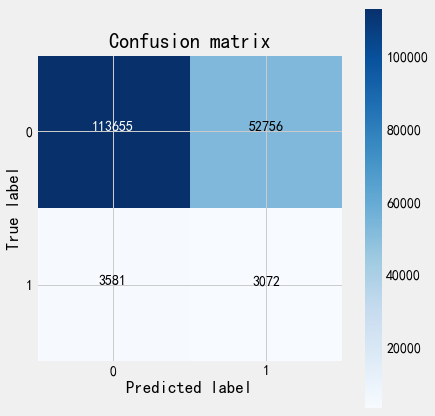

In [179]:
#混淆矩阵可视化
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [0,1]
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

利用lasso特征选择的子特征

In [172]:
#获取训练集和测试集
X_la_train=X_train[Las_feature]
X_la_test=X_test[Las_feature]

In [176]:
#平衡正负样本数
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
sm = SMOTE(random_state=42) 
X_la_train,y_la_train=sm.fit_resample(X_la_train,y_train)
print(sorted(Counter(y_la_train).items()))

[(0, 905031), (1, 905031)]


In [177]:
#利用随机森林分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf_RF=RandomForestClassifier(n_estimators=100,random_state=42)#构建分类随机森林分类器
clf_RF.fit(X_la_train,y_la_train)
#交叉验证
scores_RF=cross_val_score(clf_RF,X_la_train,y_la_train)
print('RandomForestClassifier交叉验证准确率为:'+str(scores_RF.mean()))

RandomForestClassifier交叉验证准确率为:0.9170525546772075


In [178]:
#精度
y_pred= clf_RF.predict(X_la_test)#进行预测
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))#测试集预测精度
print(classification_report(y_test,y_pred))

Test set accuracy score: 0.67447
              precision    recall  f1-score   support

           0       0.97      0.68      0.80    166411
           1       0.06      0.46      0.10      6653

    accuracy                           0.67    173064
   macro avg       0.51      0.57      0.45    173064
weighted avg       0.93      0.67      0.77    173064



Recall metric in the testing dataset:  0.4617465804900045


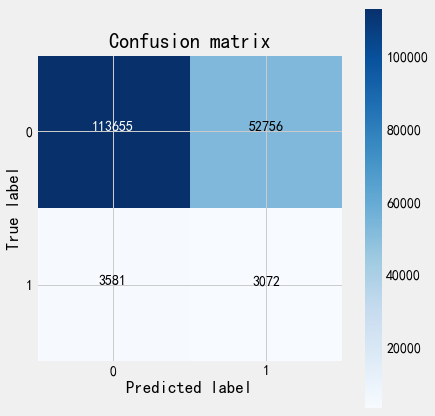

In [180]:
#混淆矩阵可视化
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [0,1]
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()


利用随机森林特征重要性筛选的特征子集

In [183]:
#获取训练集和测试集
X_rf_train=X_train[rf_feature]
X_rf_test=X_test[rf_feature]

#平衡正负样本数
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
sm = SMOTE(random_state=42) 
X_rf_train,y_rf_train=sm.fit_resample(X_rf_train,y_train)
print(sorted(Counter(y_rf_train).items()))

#利用随机森林进行分类
clf_RF=RandomForestClassifier(n_estimators=100,random_state=42)#构建分类随机森林分类器
clf_RF.fit(X_rf_train,y_rf_train)
#交叉验证
scores_RF=cross_val_score(clf_RF,X_rf_train,y_rf_train)
print('RandomForestClassifier交叉验证准确率为:'+str(scores_RF.mean()))

[(0, 905031), (1, 905031)]
RandomForestClassifier交叉验证准确率为:0.9577141483910262


In [184]:
#精度
y_pred= clf_RF.predict(X_rf_test)#进行预测
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))#测试集预测精度
print(classification_report(y_test,y_pred))

Test set accuracy score: 0.89232
              precision    recall  f1-score   support

           0       0.96      0.92      0.94    166411
           1       0.07      0.14      0.09      6653

    accuracy                           0.89    173064
   macro avg       0.51      0.53      0.52    173064
weighted avg       0.93      0.89      0.91    173064



Recall metric in the testing dataset:  0.13542762663460092


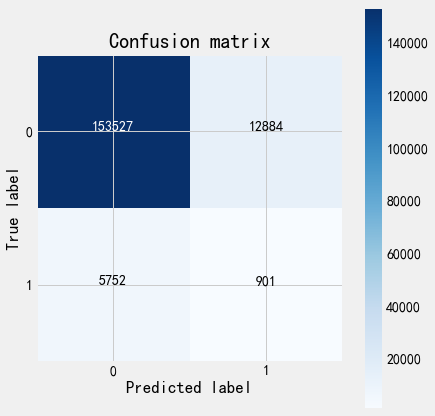

In [185]:
#混淆矩阵可视化
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [0,1]
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

利用GDBT筛选的特征子集

In [189]:
#获取训练集和测试集
X_GBDT_train=X_train[GBDT_feature]
X_GBDT_test=X_test[GBDT_feature]

#平衡正负样本数
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
sm = SMOTE(random_state=42) 
X_GBDT_train,y_GBDT_train=sm.fit_resample(X_GBDT_train,y_train)
print(sorted(Counter(y_GBDT_train).items()))

#利用随机森林进行分类
clf_RF=RandomForestClassifier(n_estimators=100,random_state=42)#构建分类随机森林分类器
clf_RF.fit(X_GBDT_train,y_GBDT_train)
#交叉验证
scores_RF=cross_val_score(clf_RF,X_GBDT_train,y_GBDT_train)
print('RandomForestClassifier交叉验证准确率为:'+str(scores_RF.mean()))

[(0, 905031), (1, 905031)]
RandomForestClassifier交叉验证准确率为:0.9171138758733981


In [191]:
#精度
y_pred= clf_RF.predict(X_GBDT_test)#进行预测
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))#测试集预测精度
print(classification_report(y_test,y_pred))

Test set accuracy score: 0.80475
              precision    recall  f1-score   support

           0       0.96      0.83      0.89    166411
           1       0.05      0.24      0.08      6653

    accuracy                           0.80    173064
   macro avg       0.51      0.53      0.49    173064
weighted avg       0.93      0.80      0.86    173064



Recall metric in the testing dataset:  0.23553284232676988


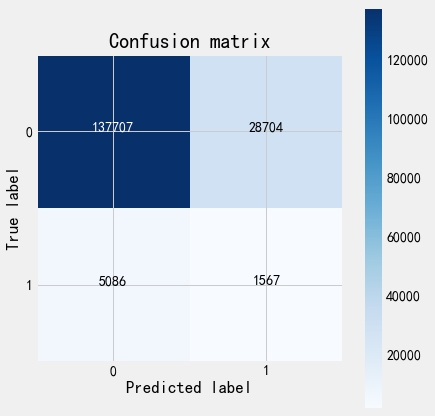

In [192]:
#混淆矩阵可视化
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [0,1]
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

## 使用多层感知机

全部特征

In [202]:
#获取训练集和测试集
X_all_train=X_train
X_all_test=X_test

#平衡正负样本数
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
sm = SMOTE(random_state=42) 
X_all_train,y_all_train=sm.fit_resample(X_all_train,y_train)
print(sorted(Counter(y_all_train).items()))

#利用随机森林分类器
from sklearn.neural_network import MLPClassifier
clf_MLP= MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(30,20), random_state=1)

clf_MLP.fit(X_all_train,y_all_train)
#交叉验证
scores_RF=cross_val_score(clf_MLP,X_all_train,y_all_train)
print('mlp交叉验证准确率为:'+str(scores_mlp.mean()))

[(0, 905031), (1, 905031)]


D:\install\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\install\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\install\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "D:\install\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 400, in _fit
    intercept_grads, layer_units, incremental)
  File "D:\install\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 553, in _fit_stochastic
    random_state=self._random_state)
  File "D:\install\anaconda\lib\site-packages\sklearn\utils\__init__.py", line 632, in shuffle
    rand

NameError: name 'scores_mlp' is not defined

In [206]:
#精度
y_pred= clf_MLP.predict(X_all_test)#进行预测
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))#测试集预测精度
print(classification_report(y_test,y_pred))

Test set accuracy score: 0.62246
              precision    recall  f1-score   support

           0       0.97      0.63      0.76    166411
           1       0.06      0.56      0.10      6653

    accuracy                           0.62    173064
   macro avg       0.51      0.59      0.43    173064
weighted avg       0.94      0.62      0.74    173064



Recall metric in the testing dataset:  0.5576431684954156


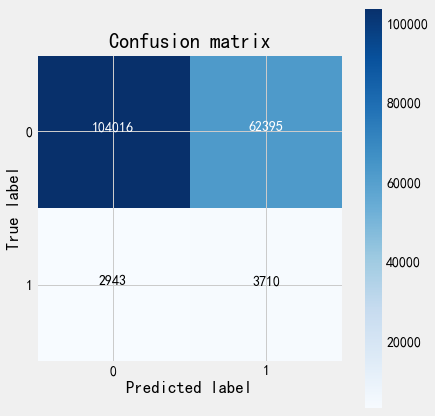

In [207]:
#混淆矩阵可视化
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [0,1]
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [ ]:
data